<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from IPython.display import Image

# **1. 비지도 학습의 개요**

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되어 있는지를 알아내는 문제의 범주에 속한다. 이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reignforcement Learing)과 달리 **입력값에 대한 목표치가 주어지지 않는다.**

    * 차원 축소: PCA, LDA, SVD
    * 군집화: KMeans Clustering, DBSCAN
    * 군집화 평가


# **2. 차원 축소**

    * feature의 개수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 한다.
    * 계산 비용을 감소하는 효과
    * 전반적인 데이터에 대한 이해도를 높이는 효과

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

## **2-1. 데이터 로드(iris 데이터)**

In [35]:
iris=datasets.load_iris()

In [36]:
data=iris['data']

In [37]:
data[:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
df=pd.DataFrame(data,columns=iris['feature_names'])

In [39]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df['target']=iris['target']

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **2-2. PCA 차원 축소**


주성분 분석(PCA, Principle Component Analysis)는 선형 차원 축소 기법이다. 매우 인기 있게 사용되는 차원 축소 기법중 하나이다. 

PCA는 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다. 주요 특징 중의 하나는 **분산(variance)을 최대한 보존**한다는 점이다.

    * 분산 보존: PCA는 "데이터의 분산이 최대"가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터 셋 간의 "평균제곱거리를 최소화"하는 축을 찾는더.

    * PCA 실현 과정: 
        1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다.
        2. 이렇게 찾은 첫 번째 축과 지교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
        3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
        4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.
    
    이렇게 i번째 축을 정의하는 "단위 벡터(unit-vector)"를 i번째 "주성분(PC, Principle Component)이라고 한다."


[sklearn에서 실현]

    * n_components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
    * n_components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소


**(1) 주성분 2개로 지정(n_components=2)**

In [42]:
from sklearn.decomposition import PCA

In [43]:
# 모델 선언
pca=PCA(n_components=2)

# data scaling
data_scaled=StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

# PCA 실행
pca_data=pca.fit_transform(data_scaled)

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [46]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [47]:
# 주성분에 따른 데이터 시각화
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

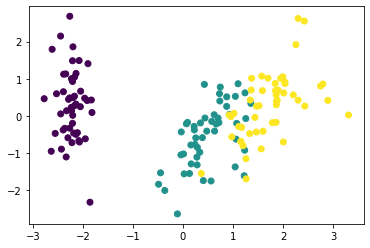

In [48]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=df['target']) # c: color 기준

**(2) 분산을 기준으로 차원 축소 (n_components<1)**

In [49]:
pca2=PCA(n_components=0.99)
pca_data2=pca2.fit_transform(data_scaled)
pca_data2[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

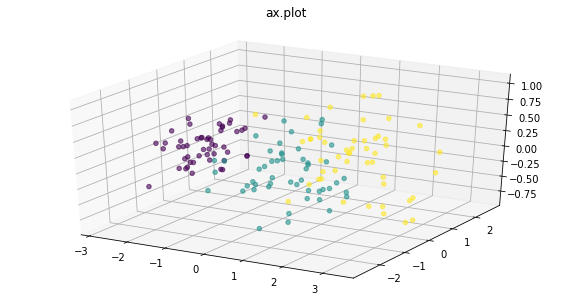

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')  # Axe3D object

sample_size=50
ax.scatter(pca_data2[:,0],pca_data2[:,1],pca_data2[:,2],alpha=0.6,c=df['target'])
plt.savefig('./tmp.svg')
plt.title('ax.plot')
plt.show()

## **2-3. LDA 차원 축소**

LDA (Linear Discriminant Analysis): 선형 판별 분석법 (PCA와 유사)

LDA는 클래스(Class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 내분 분산(withing-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함.

즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다.

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [52]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# 모델 선언
lda=LinearDiscriminantAnalysis(n_components=2)

# data scaling
data_scaled=StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

# LDA 실행
lda_data=lda.fit_transform(data_scaled, df['target'])

In [54]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

시각화

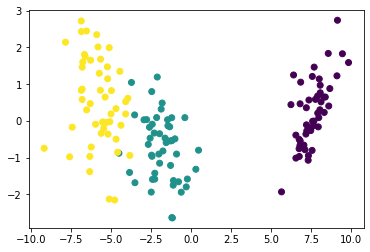

In [55]:
# LDA
plt.scatter(lda_data[:,0],lda_data[:,1],c=df['target'])

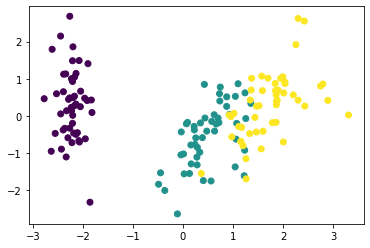

In [56]:
# PCA
plt.scatter(pca_data[:,0],pca_data[:,1],c=df['target'])

## **2-4. SVD (특이값 분해)**

SVD (Singular Value Decomposition):
    
    * 특이값 분해 기법이다.
    * PCA와 유사한 차원 축소 기법이다.
    * scikit-learn 패키지에서는 truncated SVD (aka LSA)을 사용한다.
    * 상품의 추천 시스템에도 활용되어지는 알고리즘 (추천 시스템)

In [57]:
from sklearn.decomposition import TruncatedSVD

In [58]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
svd=TruncatedSVD(n_components=2)
data_scaled=StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])
svd_data=svd.fit_transform(data_scaled)

In [60]:
svd_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

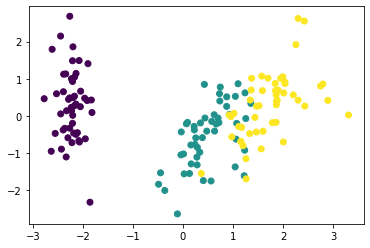

In [61]:
# SVD
plt.scatter(svd_data[:,0],svd_data[:,1], c=df['target'])

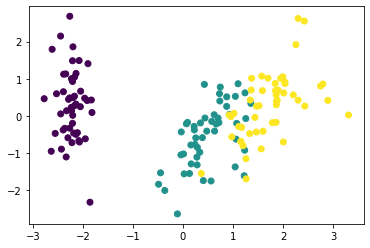

In [62]:
# PCA
plt.scatter(pca_data[:,0],pca_data[:,1],c=df['target'])

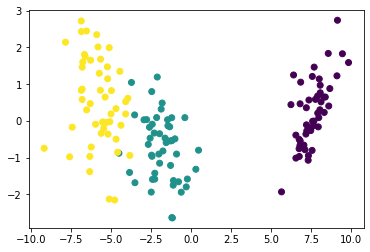

In [63]:
# LDA
plt.scatter(lda_data[:,0],lda_data[:,1],c=df['target'])

# **3. 군집화**

## **3-1. K-Means Clustering**

군집화에서 가장 대중적으로 사용되는 알고리즘이다. centroid라는 중점을 기준으로 가장 가까운 포인트를 선택하는 군집화 기법이다.

**원리**: 주어진 데이터를 k개의 cluster로 묶는 방식, 거리 차이의 분산을 최소화하는 방식으로 동작.

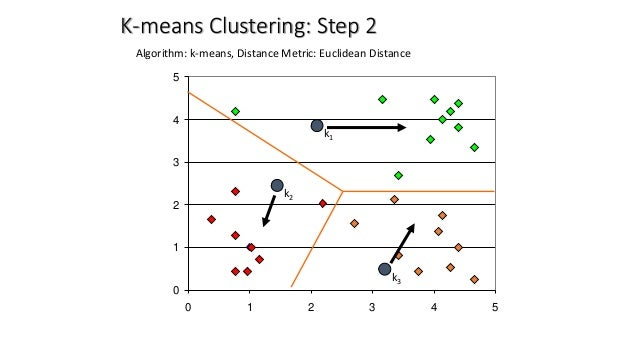

In [64]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

**사용되는 예제**
    
    * 스팸 문자 분류
    * 뉴스 기사 분류

In [65]:
from sklearn.cluster import KMeans

In [66]:
kmeans=KMeans(n_clusters=3)
data_scaled=StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])
cluster_data=kmeans.fit_transform(data_scaled)

In [67]:
cluster_data[:5]

array([[0.21295824, 3.12119834, 3.98940603],
       [0.99604549, 2.6755083 , 4.01793312],
       [0.65198444, 2.97416665, 4.19343668],
       [0.9034561 , 2.88014429, 4.19784749],
       [0.40215457, 3.30022609, 4.11157152]])

In [68]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


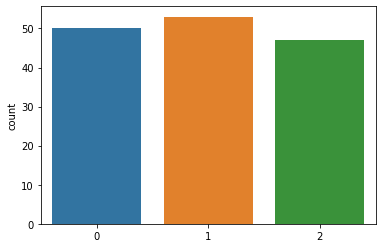

In [69]:
sns.countplot(kmeans.labels_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


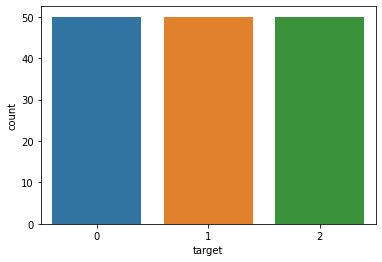

In [70]:
sns.countplot(df['target'])

In [71]:
kmeans

KMeans(n_clusters=3)

In [72]:
# max_iter: maximum number of iterations for a single run
kmeans2=KMeans(n_clusters=3, max_iter=500)
data_scaled=StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])
cluster_data2=kmeans2.fit_transform(data_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


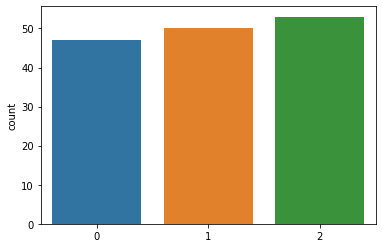

In [73]:
sns.countplot(kmeans2.labels_)

## **3-2. DBSCAN**

**밀도 기반 클러스터링**
(DBSCAN: Dencity-Based Spatial Clustering of Applications with Noise)

    * 밀도가 높은 부분을 클러스터링 하는 방식
    * 어느 점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
    * KMeans 에서는 n_cluster의 개수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음.
    * 기하학적인 clustering도 잘 찾아냄.

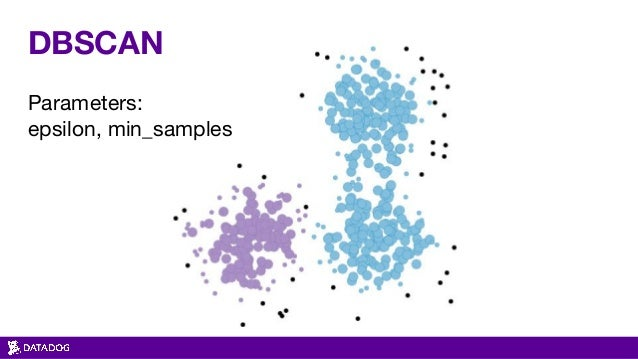

In [74]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

주의: 변환 시 **fit_transform()** 대신 **fit_predict()**를 쓴다.

## **3-3. 실루엣 스코어 (군집화 평가)**

클러스터링의 품질을 정량적으로 평가해 주는 지표

    * 1: 클러스터링의 품질이 좋다
    * 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
    * 음수: 잘못 분류됨


In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [76]:
data_scaled=StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])
score=silhouette_score(data_scaled, kmeans.labels_)
score

0.45994823920518635

In [77]:
samples=silhouette_samples(data_scaled, kmeans.labels_)
samples[:5]

array([0.73419485, 0.56827391, 0.67754724, 0.62050159, 0.72847412])

In [78]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


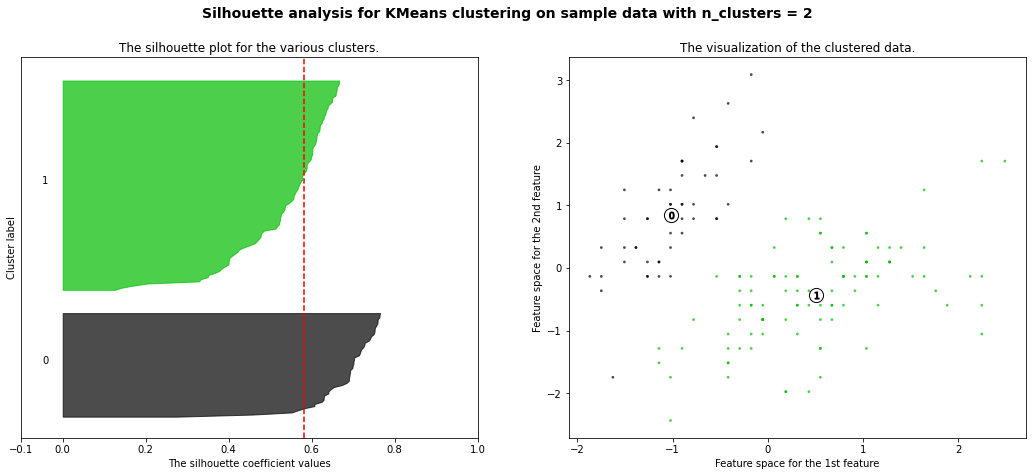

For n_clusters = 3 The average silhouette_score is : 0.45994823920518635


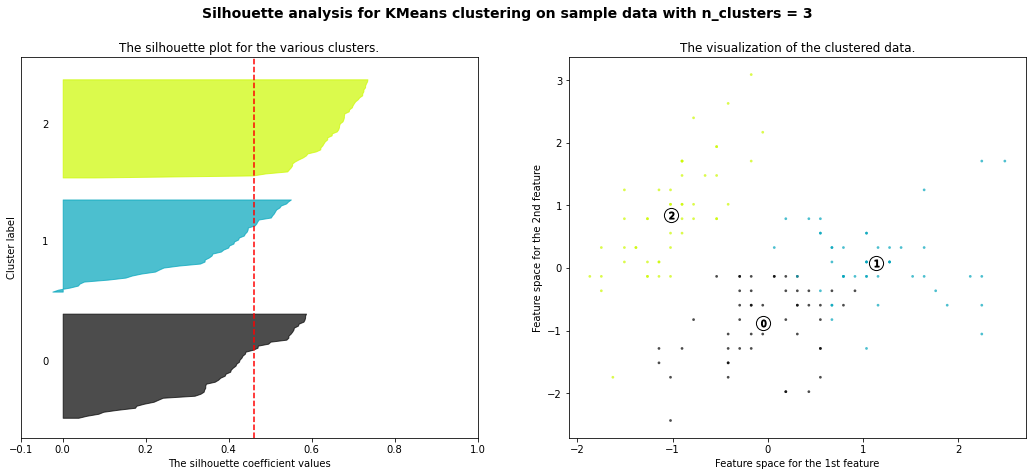

For n_clusters = 4 The average silhouette_score is : 0.383850922475103


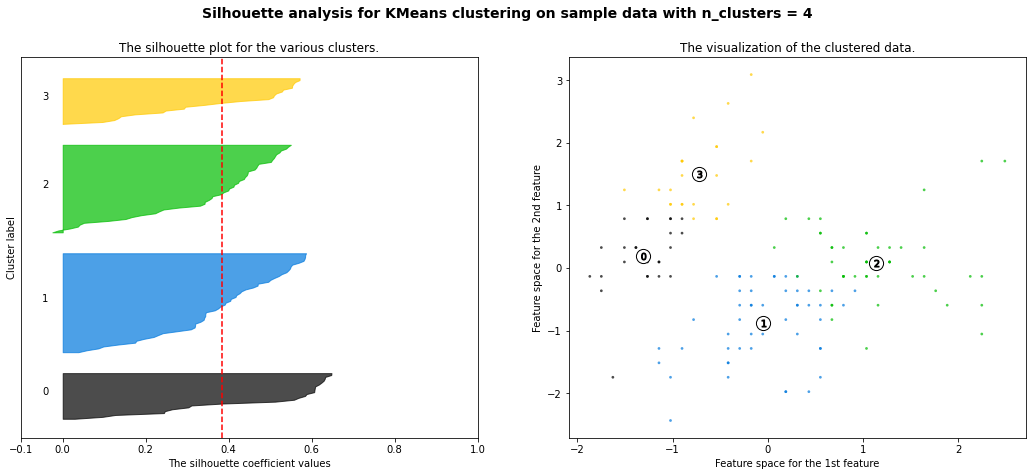

For n_clusters = 5 The average silhouette_score is : 0.34273996820787694


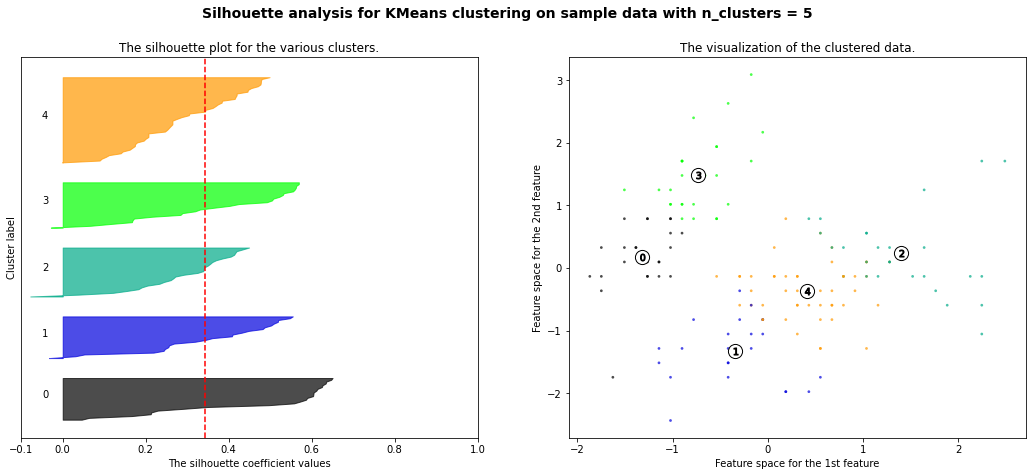

In [79]:
plot_silhouette(data_scaled, [2, 3, 4, 5])